In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

uni_data = pd.read_csv('../../prepared_tables/data_for_report_train_test_model_on_self_recorded_data/2022_12_06-08_35_59_PM_Table_UP_Table_DOWN_uni_data_TEST.csv')
test_own_data = pd.read_csv('../../prepared_tables/data_for_report_train_test_model_on_self_recorded_data/2022_12_06-08_34_32_PM_Table_UP_Table_DOWN_new_data_TEST.csv')

train_data = pd.read_csv('../../inputs/train.csv')
test_data = pd.read_csv('../../inputs/test.csv')

In [299]:
prepared_table = pd.concat([uni_data, test_own_data], axis=0).reset_index(drop=True)
prepared_table

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.488941,0.106466,-0.498900,0.649484,1.734789,0.811103,0.559107,1.243836,0.701172,1.564101,...,-0.378126,-0.045662,-0.058338,0.023749,0.034132,0.008229,0.233274,0.175700,0.104763,WALKING_UPSTAIRS
1,0.437071,0.303639,-0.504424,0.611379,1.180292,0.790977,0.539568,0.871591,0.615926,1.453269,...,-0.257632,-0.463799,-0.215025,0.013525,0.067159,0.018413,0.220599,0.252745,0.244117,WALKING_UPSTAIRS
2,0.285927,0.216237,-0.395284,0.687936,1.402343,0.583938,0.570732,1.080691,0.463385,1.785157,...,-0.271071,-0.363159,-0.230907,0.031225,0.083592,0.014791,0.328340,0.496404,0.130267,WALKING_UPSTAIRS
3,0.578575,0.035007,-0.336702,0.515013,1.453956,0.930995,0.425783,1.120727,0.723397,1.416565,...,-0.265574,-0.338877,-0.266948,0.017495,0.063571,0.036401,0.187154,0.321239,0.313756,WALKING_UPSTAIRS
4,0.064121,-0.021307,-0.339204,0.316778,1.521262,0.578970,0.227586,1.139976,0.522901,0.969029,...,-0.365908,-0.537867,-0.252593,0.029636,0.055228,0.014284,0.264963,0.331700,0.126831,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,1.052601,0.120512,-0.140110,0.909101,2.386149,0.499764,0.739426,1.974377,0.397301,2.701095,...,-0.379183,-0.476919,-0.229831,0.038736,0.097982,0.013979,0.324245,0.463633,0.161073,WALKING_DOWNSTAIRS
606,-0.753821,0.097080,-0.259892,0.779565,2.217774,0.501413,0.691400,1.821157,0.386739,0.684892,...,-0.305729,-0.537240,-0.222043,0.033428,0.085951,0.006838,0.269689,0.495588,0.100599,WALKING_DOWNSTAIRS
607,-0.153631,0.245310,-0.218028,0.813680,2.170348,0.659931,0.649450,1.722738,0.527951,2.026596,...,-0.432327,-0.375976,-0.184629,0.057646,0.151107,0.010936,0.266558,0.273583,0.155804,WALKING_DOWNSTAIRS
608,0.174269,-0.171825,-0.206283,0.738740,2.231625,0.491752,0.642054,1.817120,0.382575,1.689014,...,-0.310921,-0.520595,-0.492648,0.037277,0.066027,0.023367,0.312983,0.395371,0.178826,WALKING_DOWNSTAIRS


In [300]:
print("No. of nulls: {}".format(prepared_table.isna().sum().sum()))

No. of nulls: 168


In [301]:
def removeNulls(df_sets, labels):
    print("No. of nulls: {}".format(df_sets.isna().sum().sum()))
    df_no_nulls = df_sets.dropna(subset=labels)
    print("No. of nulls: {}".format(df_no_nulls.isna().sum().sum()))
    return df_no_nulls

In [302]:
column_labels = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
    'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
    'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
    'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
    'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z',
    'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z',
    'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
    'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z',
    'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z',
    'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z',
    'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z',
    'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
    'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y',
    'tGravityAcc-iqr()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y',
    'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y',
    'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y',
    'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y',
    'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y',
    'tBodyGyro-min()-Z', 'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y',
    'tBodyGyro-energy()-Z', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y',
    'tBodyGyro-iqr()-Z'
]

In [303]:
# Prepare recorded data
prepared_table_df = pd.DataFrame(prepared_table)
prepared_table_df_no_nulls = removeNulls(prepared_table_df, column_labels)
prepared_table_df_no_nulls

No. of nulls: 168
No. of nulls: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.488941,0.106466,-0.498900,0.649484,1.734789,0.811103,0.559107,1.243836,0.701172,1.564101,...,-0.378126,-0.045662,-0.058338,0.023749,0.034132,0.008229,0.233274,0.175700,0.104763,WALKING_UPSTAIRS
1,0.437071,0.303639,-0.504424,0.611379,1.180292,0.790977,0.539568,0.871591,0.615926,1.453269,...,-0.257632,-0.463799,-0.215025,0.013525,0.067159,0.018413,0.220599,0.252745,0.244117,WALKING_UPSTAIRS
2,0.285927,0.216237,-0.395284,0.687936,1.402343,0.583938,0.570732,1.080691,0.463385,1.785157,...,-0.271071,-0.363159,-0.230907,0.031225,0.083592,0.014791,0.328340,0.496404,0.130267,WALKING_UPSTAIRS
3,0.578575,0.035007,-0.336702,0.515013,1.453956,0.930995,0.425783,1.120727,0.723397,1.416565,...,-0.265574,-0.338877,-0.266948,0.017495,0.063571,0.036401,0.187154,0.321239,0.313756,WALKING_UPSTAIRS
4,0.064121,-0.021307,-0.339204,0.316778,1.521262,0.578970,0.227586,1.139976,0.522901,0.969029,...,-0.365908,-0.537867,-0.252593,0.029636,0.055228,0.014284,0.264963,0.331700,0.126831,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,1.052601,0.120512,-0.140110,0.909101,2.386149,0.499764,0.739426,1.974377,0.397301,2.701095,...,-0.379183,-0.476919,-0.229831,0.038736,0.097982,0.013979,0.324245,0.463633,0.161073,WALKING_DOWNSTAIRS
606,-0.753821,0.097080,-0.259892,0.779565,2.217774,0.501413,0.691400,1.821157,0.386739,0.684892,...,-0.305729,-0.537240,-0.222043,0.033428,0.085951,0.006838,0.269689,0.495588,0.100599,WALKING_DOWNSTAIRS
607,-0.153631,0.245310,-0.218028,0.813680,2.170348,0.659931,0.649450,1.722738,0.527951,2.026596,...,-0.432327,-0.375976,-0.184629,0.057646,0.151107,0.010936,0.266558,0.273583,0.155804,WALKING_DOWNSTAIRS
608,0.174269,-0.171825,-0.206283,0.738740,2.231625,0.491752,0.642054,1.817120,0.382575,1.689014,...,-0.310921,-0.520595,-0.492648,0.037277,0.066027,0.023367,0.312983,0.395371,0.178826,WALKING_DOWNSTAIRS


In [304]:
df_train = pd.DataFrame(train_data)
columns_to_drop = ["tBodyAcc-sma()",
                   "tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z",
                   "tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",
                   "tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4",
                   "tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4",
                   "tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",

                   "tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4",
                   "tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4",
                   "tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",

                   "tGravityAcc-sma()", "tBodyGyro-sma()","tBodyAccMag-sma()",

                   "tGravityAcc-entropy()-X","tGravityAcc-entropy()-Y","tGravityAcc-entropy()-Z",

                   "tGravityAcc-correlation()-X,Y", "tGravityAcc-correlation()-X,Z", "tGravityAcc-correlation()-Y,Z",

                   "tBodyGyro-entropy()-X","tBodyGyro-entropy()-Y","tBodyGyro-entropy()-Z",

                   "tBodyAccMag-entropy()",

                   "tBodyAccMag-arCoeff()1", "tBodyAccMag-arCoeff()2", "tBodyAccMag-arCoeff()3", "tBodyAccMag-arCoeff()4",

                   "tBodyGyroJerkMag-sma()","tBodyGyroJerkMag-energy()","tBodyGyroJerkMag-iqr()","tBodyGyroJerkMag-entropy()",
                   "tBodyGyroJerkMag-arCoeff()1","tBodyGyroJerkMag-arCoeff()2","tBodyGyroJerkMag-arCoeff()3","tBodyGyroJerkMag-arCoeff()4",
                   "tBodyGyroJerkMag-mean()", "tBodyGyroJerkMag-std()","tBodyGyroJerkMag-mad()", "tBodyGyroJerkMag-max()","tBodyGyroJerkMag-min()",

                   "tBodyAccJerk-mean()-X","tBodyAccJerk-mean()-Y","tBodyAccJerk-mean()-Z",
                   "tBodyAccJerk-std()-X","tBodyAccJerk-std()-Y","tBodyAccJerk-std()-Z",
                   "tBodyAccJerk-mad()-X","tBodyAccJerk-mad()-Y","tBodyAccJerk-mad()-Z",
                   "tBodyAccJerk-max()-X","tBodyAccJerk-max()-Y","tBodyAccJerk-max()-Z",
                   "tBodyAccJerk-min()-X","tBodyAccJerk-min()-Y","tBodyAccJerk-min()-Z",
                   "tBodyAccJerk-sma()",
                   "tBodyAccJerk-energy()-X","tBodyAccJerk-energy()-Y","tBodyAccJerk-energy()-Z",
                   "tBodyAccJerk-iqr()-X","tBodyAccJerk-iqr()-Y","tBodyAccJerk-iqr()-Z",
                   "tBodyAccJerk-entropy()-X","tBodyAccJerk-entropy()-Y","tBodyAccJerk-entropy()-Z",
                   "tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4",

                   "tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4",
                   "tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4",
                   "tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",

                   'tBodyGyro-correlation()-X,Y', 'tBodyGyro-correlation()-X,Z', 'tBodyGyro-correlation()-Y,Z',
                   'tBodyGyro-arCoeff()-X,1',
                   'tBodyGyro-arCoeff()-X,2', 'tBodyGyro-arCoeff()-X,3',
                   'tBodyGyro-arCoeff()-X,4', 'tBodyGyro-arCoeff()-Y,1',
                   'tBodyGyro-arCoeff()-Y,2', 'tBodyGyro-arCoeff()-Y,3',
                   'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,1',
                   'tBodyGyro-arCoeff()-Z,2', 'tBodyGyro-arCoeff()-Z,3',
                   'tBodyGyro-arCoeff()-Z,4',

                   "tBodyGyroJerk-mean()-X","tBodyGyroJerk-mean()-Y","tBodyGyroJerk-mean()-Z",
                   "tBodyGyroJerk-std()-X","tBodyGyroJerk-std()-Y","tBodyGyroJerk-std()-Z",
                   "tBodyGyroJerk-mad()-X","tBodyGyroJerk-mad()-Y","tBodyGyroJerk-mad()-Z",
                   "tBodyGyroJerk-max()-X","tBodyGyroJerk-max()-Y","tBodyGyroJerk-max()-Z",
                   "tBodyGyroJerk-min()-X","tBodyGyroJerk-min()-Y","tBodyGyroJerk-min()-Z",
                   "tBodyGyroJerk-sma()","tBodyGyroJerk-energy()-X","tBodyGyroJerk-energy()-Y",
                   "tBodyGyroJerk-energy()-Z","tBodyGyroJerk-iqr()-X","tBodyGyroJerk-iqr()-Y","tBodyGyroJerk-iqr()-Z",
                   "tBodyGyroJerk-entropy()-X","tBodyGyroJerk-entropy()-Y","tBodyGyroJerk-entropy()-Z",
                   "tBodyGyroJerk-arCoeff()-X,1","tBodyGyroJerk-arCoeff()-X,2","tBodyGyroJerk-arCoeff()-X,3","tBodyGyroJerk-arCoeff()-X,4",
                   "tBodyGyroJerk-arCoeff()-Y,1","tBodyGyroJerk-arCoeff()-Y,2","tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Y,4",
                   "tBodyGyroJerk-arCoeff()-Z,1","tBodyGyroJerk-arCoeff()-Z,2","tBodyGyroJerk-arCoeff()-Z,3","tBodyGyroJerk-arCoeff()-Z,4",
                   "tBodyGyroJerk-correlation()-X,Y","tBodyGyroJerk-correlation()-X,Z","tBodyGyroJerk-correlation()-Y,Z",

                   'tBodyGyroMag-sma()',
                   'tBodyGyroMag-entropy()',
                   'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2',
                   'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4',
                   'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()',
                   'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()',
                   'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()',
                   'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()',
                   'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoeff()1',
                   'tBodyAccJerkMag-arCoeff()2', 'tBodyAccJerkMag-arCoeff()3',
                   'tBodyAccJerkMag-arCoeff()4',

                   'tGravityAccMag-sma()',
                   'tGravityAccMag-entropy()',

                   'tGravityAccMag-arCoeff()1',
                   'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3',
                   'tGravityAccMag-arCoeff()4',

                   "fBodyAcc-mean()-X","fBodyAcc-mean()-Y","fBodyAcc-mean()-Z","fBodyAcc-std()-X","fBodyAcc-std()-Y","fBodyAcc-std()-Z",
                   "fBodyAcc-mad()-X","fBodyAcc-mad()-Y","fBodyAcc-mad()-Z","fBodyAcc-max()-X","fBodyAcc-max()-Y","fBodyAcc-max()-Z",
                   "fBodyAcc-min()-X","fBodyAcc-min()-Y","fBodyAcc-min()-Z","fBodyAcc-sma()",
                   "fBodyAcc-energy()-X","fBodyAcc-energy()-Y","fBodyAcc-energy()-Z",
                   "fBodyAcc-iqr()-X","fBodyAcc-iqr()-Y","fBodyAcc-iqr()-Z",
                   "fBodyAcc-entropy()-X","fBodyAcc-entropy()-Y","fBodyAcc-entropy()-Z",
                   "fBodyAcc-maxInds-X","fBodyAcc-maxInds-Y","fBodyAcc-maxInds-Z",
                   "fBodyAcc-meanFreq()-X","fBodyAcc-meanFreq()-Y","fBodyAcc-meanFreq()-Z",
                   "fBodyAcc-skewness()-X",
                   "fBodyAcc-kurtosis()-X",
                   "fBodyAcc-skewness()-Y",
                   "fBodyAcc-kurtosis()-Y",
                   "fBodyAcc-skewness()-Z",
                   "fBodyAcc-kurtosis()-Z",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16",
                   "fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48",
                   "fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32",
                   "fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAccJerk-mean()-X","fBodyAccJerk-mean()-Y","fBodyAccJerk-mean()-Z",
                   "fBodyAccJerk-std()-X","fBodyAccJerk-std()-Y","fBodyAccJerk-std()-Z",
                   "fBodyAccJerk-mad()-X","fBodyAccJerk-mad()-Y","fBodyAccJerk-mad()-Z",
                   "fBodyAccJerk-max()-X","fBodyAccJerk-max()-Y","fBodyAccJerk-max()-Z",
                   "fBodyAccJerk-min()-X","fBodyAccJerk-min()-Y","fBodyAccJerk-min()-Z",
                   "fBodyAccJerk-sma()",
                   "fBodyAccJerk-energy()-X","fBodyAccJerk-energy()-Y","fBodyAccJerk-energy()-Z",
                   "fBodyAccJerk-iqr()-X","fBodyAccJerk-iqr()-Y","fBodyAccJerk-iqr()-Z",
                   "fBodyAccJerk-entropy()-X","fBodyAccJerk-entropy()-Y","fBodyAccJerk-entropy()-Z",
                   "fBodyAccJerk-maxInds-X","fBodyAccJerk-maxInds-Y","fBodyAccJerk-maxInds-Z",
                   "fBodyAccJerk-meanFreq()-X","fBodyAccJerk-meanFreq()-Y","fBodyAccJerk-meanFreq()-Z",
                   "fBodyAccJerk-skewness()-X",
                   "fBodyAccJerk-kurtosis()-X",
                   "fBodyAccJerk-skewness()-Y",
                   "fBodyAccJerk-kurtosis()-Y",
                   "fBodyAccJerk-skewness()-Z",
                   "fBodyAccJerk-kurtosis()-Z",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16",
                   "fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32","fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48",
                   "fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64","fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32",
                   "fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyGyro-mean()-X","fBodyGyro-mean()-Y","fBodyGyro-mean()-Z",
                   "fBodyGyro-std()-X","fBodyGyro-std()-Y","fBodyGyro-std()-Z",
                   "fBodyGyro-mad()-X","fBodyGyro-mad()-Y","fBodyGyro-mad()-Z",
                   "fBodyGyro-max()-X","fBodyGyro-max()-Y","fBodyGyro-max()-Z",
                   "fBodyGyro-min()-X","fBodyGyro-min()-Y","fBodyGyro-min()-Z",
                   "fBodyGyro-sma()",
                   "fBodyGyro-energy()-X","fBodyGyro-energy()-Y","fBodyGyro-energy()-Z",
                   "fBodyGyro-iqr()-X","fBodyGyro-iqr()-Y","fBodyGyro-iqr()-Z",
                   "fBodyGyro-entropy()-X","fBodyGyro-entropy()-Y","fBodyGyro-entropy()-Z",
                   "fBodyGyro-maxInds-X","fBodyGyro-maxInds-Y","fBodyGyro-maxInds-Z",
                   "fBodyGyro-meanFreq()-X","fBodyGyro-meanFreq()-Y","fBodyGyro-meanFreq()-Z",
                   "fBodyGyro-skewness()-X",
                   "fBodyGyro-kurtosis()-X",
                   "fBodyGyro-skewness()-Y",
                   "fBodyGyro-kurtosis()-Y",
                   "fBodyGyro-skewness()-Z",
                   "fBodyGyro-kurtosis()-Z",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48","fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16",
                   "fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32","fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48",
                   "fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64","fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32",
                   "fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64","fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyAccMag-mean()","fBodyAccMag-std()","fBodyAccMag-mad()",
                   "fBodyAccMag-max()","fBodyAccMag-min()","fBodyAccMag-sma()",
                   "fBodyAccMag-energy()","fBodyAccMag-iqr()","fBodyAccMag-entropy()",
                   "fBodyAccMag-maxInds","fBodyAccMag-meanFreq()","fBodyAccMag-skewness()",
                   "fBodyAccMag-kurtosis()",
                   "fBodyBodyAccJerkMag-mean()","fBodyBodyAccJerkMag-std()","fBodyBodyAccJerkMag-mad()","fBodyBodyAccJerkMag-max()",
                   "fBodyBodyAccJerkMag-min()","fBodyBodyAccJerkMag-sma()","fBodyBodyAccJerkMag-energy()","fBodyBodyAccJerkMag-iqr()",
                   "fBodyBodyAccJerkMag-entropy()","fBodyBodyAccJerkMag-maxInds","fBodyBodyAccJerkMag-meanFreq()",
                   "fBodyBodyAccJerkMag-skewness()","fBodyBodyAccJerkMag-kurtosis()","fBodyBodyGyroMag-mean()",
                   "fBodyBodyGyroMag-std()","fBodyBodyGyroMag-mad()","fBodyBodyGyroMag-max()","fBodyBodyGyroMag-min()",
                   "fBodyBodyGyroMag-sma()","fBodyBodyGyroMag-energy()","fBodyBodyGyroMag-iqr()","fBodyBodyGyroMag-entropy()",
                   "fBodyBodyGyroMag-maxInds","fBodyBodyGyroMag-meanFreq()","fBodyBodyGyroMag-skewness()","fBodyBodyGyroMag-kurtosis()",
                   "fBodyBodyGyroJerkMag-mean()","fBodyBodyGyroJerkMag-std()","fBodyBodyGyroJerkMag-mad()","fBodyBodyGyroJerkMag-max()",
                   "fBodyBodyGyroJerkMag-min()","fBodyBodyGyroJerkMag-sma()","fBodyBodyGyroJerkMag-energy()","fBodyBodyGyroJerkMag-iqr()",
                   "fBodyBodyGyroJerkMag-entropy()","fBodyBodyGyroJerkMag-maxInds","fBodyBodyGyroJerkMag-meanFreq()",
                   "fBodyBodyGyroJerkMag-skewness()","fBodyBodyGyroJerkMag-kurtosis()","angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)",
                   "angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",
                   "angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",
                   "fBodyGyro-bandsEnergy()-49,56.2", "fBodyGyro-bandsEnergy()-57,64.2","fBodyGyro-bandsEnergy()-1,16.2", "fBodyGyro-bandsEnergy()-17,32.2",
                   "fBodyGyro-bandsEnergy()-33,48.2",
                   "fBodyGyro-bandsEnergy()-9,16.2", "fBodyGyro-bandsEnergy()-17,24.2", "fBodyGyro-bandsEnergy()-25,32.2", "fBodyGyro-bandsEnergy()-33,40.2", "fBodyGyro-bandsEnergy()-41,48.2",
                   "fBodyGyro-bandsEnergy()-49,64.2","fBodyGyro-bandsEnergy()-1,24.2","fBodyGyro-bandsEnergy()-25,48.2",
                   "fBodyGyro-bandsEnergy()-57,64.1", "fBodyGyro-bandsEnergy()-1,16.1", "fBodyGyro-bandsEnergy()-17,32.1", "fBodyGyro-bandsEnergy()-33,48.1",
                   "fBodyGyro-bandsEnergy()-49,64.1", "fBodyGyro-bandsEnergy()-1,24.1", "fBodyGyro-bandsEnergy()-25,48.1", "fBodyGyro-bandsEnergy()-1,8.2",
                   "fBodyAccJerk-bandsEnergy()-25,48.2", "fBodyGyro-bandsEnergy()-1,8.1", "fBodyGyro-bandsEnergy()-9,16.1",
                   "fBodyGyro-bandsEnergy()-17,24.1", "fBodyGyro-bandsEnergy()-25,32.1", "fBodyGyro-bandsEnergy()-33,40.1",
                   "fBodyGyro-bandsEnergy()-41,48.1", "fBodyGyro-bandsEnergy()-49,56.1",
                   "fBodyAccJerk-bandsEnergy()-41,48.2", "fBodyAccJerk-bandsEnergy()-49,56.2", "fBodyAccJerk-bandsEnergy()-57,64.2","fBodyAccJerk-bandsEnergy()-1,16.2",
                   "fBodyAccJerk-bandsEnergy()-17,32.2", "fBodyAccJerk-bandsEnergy()-33,48.2", "fBodyAccJerk-bandsEnergy()-49,64.2", "fBodyAccJerk-bandsEnergy()-1,24.2",
                   "fBodyAccJerk-bandsEnergy()-49,64.1", "fBodyAccJerk-bandsEnergy()-1,24.1", "fBodyAccJerk-bandsEnergy()-25,48.1", "fBodyAccJerk-bandsEnergy()-1,8.2",
                   "fBodyAccJerk-bandsEnergy()-9,16.2", "fBodyAccJerk-bandsEnergy()-17,24.2", "fBodyAccJerk-bandsEnergy()-25,32.2", "fBodyAccJerk-bandsEnergy()-33,40.2",
                   "fBodyAccJerk-bandsEnergy()-25,32.1", "fBodyAccJerk-bandsEnergy()-33,40.1", "fBodyAccJerk-bandsEnergy()-41,48.1", "fBodyAccJerk-bandsEnergy()-49,56.1",
                   "fBodyAccJerk-bandsEnergy()-57,64.1", "fBodyAccJerk-bandsEnergy()-1,16.1", "fBodyAccJerk-bandsEnergy()-17,32.1", "fBodyAccJerk-bandsEnergy()-33,48.1",
                   "fBodyAcc-bandsEnergy()-17,32.2", "fBodyAcc-bandsEnergy()-33,48.2", "fBodyAcc-bandsEnergy()-49,64.2", "fBodyAcc-bandsEnergy()-1,24.2",
                   "fBodyAcc-bandsEnergy()-25,48.2", "fBodyAccJerk-bandsEnergy()-1,8.1", "fBodyAccJerk-bandsEnergy()-9,16.1",
                   "fBodyAccJerk-bandsEnergy()-17,24.1",
                   'fBodyAcc-bandsEnergy()-1,8.1', 'fBodyAcc-bandsEnergy()-9,16.1',
                   'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-25,32.1',
                   'fBodyAcc-bandsEnergy()-33,40.1', 'fBodyAcc-bandsEnergy()-41,48.1',
                   'fBodyAcc-bandsEnergy()-49,56.1', 'fBodyAcc-bandsEnergy()-57,64.1',
                   'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1',
                   'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1',
                   'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1',
                   'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-9,16.2',
                   'fBodyAcc-bandsEnergy()-17,24.2', 'fBodyAcc-bandsEnergy()-25,32.2',
                   'fBodyAcc-bandsEnergy()-33,40.2', 'fBodyAcc-bandsEnergy()-41,48.2',
                   'fBodyAcc-bandsEnergy()-49,56.2', 'fBodyAcc-bandsEnergy()-57,64.2',
                   'fBodyAcc-bandsEnergy()-1,16.2', 'tBodyAccMag-mean()', 'tBodyAccMag-std()',
                   'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-min()',
                   'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tGravityAccMag-mean()',
                   'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()',
                   'tGravityAccMag-min()', 'tGravityAccMag-energy()',
                   'tGravityAccMag-iqr()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()',
                   'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-min()',
                   'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'subject'
                  ]

df_train.drop(columns_to_drop, axis = 1, inplace=True)

In [305]:
df_test = pd.DataFrame(test_data)
df_test.drop(columns_to_drop, axis = 1, inplace=True)

In [306]:
train_is_UP =  df_train['Activity']=='WALKING_UPSTAIRS'
test_is_UP =  df_test['Activity']=='WALKING_UPSTAIRS'
train_data_UP = df_train[train_is_UP]
test_data_UP = df_test[test_is_UP]

In [307]:
train_is_DOWN = df_train['Activity']=='WALKING_DOWNSTAIRS'
test_is_DOWN = df_test['Activity']=='WALKING_DOWNSTAIRS'
train_data_DOWN = df_train[train_is_DOWN]
test_data_DOWN = df_test[test_is_DOWN]

In [308]:
prepared_table_is_UP =  prepared_table_df_no_nulls['Activity']=='WALKING_UPSTAIRS'
prepared_table_is_DOWN =  prepared_table_df_no_nulls['Activity']=='WALKING_DOWNSTAIRS'
prepared_table_UP = prepared_table_df_no_nulls[prepared_table_is_UP]
prepared_table_DOWN = prepared_table_df_no_nulls[prepared_table_is_DOWN]

In [309]:
# combine both test and train data
full_data_DOWN = pd.concat([train_data_DOWN, test_data_DOWN, prepared_table_DOWN], axis=0).reset_index(drop=True)
full_data_UP = pd.concat([train_data_UP, test_data_UP, prepared_table_UP], axis=0).reset_index(drop=True)
#full_data_WALKING = pd.concat([train_data_WALKING, test_data_WALKING], axis=0).reset_index(drop=True)
full_data = pd.concat([full_data_DOWN, full_data_UP], axis = 0).reset_index(drop=True)
# Look at the shape of dataframes
print('Shape Train: {}'.format(full_data.shape))
print('Shape Test: {}\n'.format(full_data.shape))
full_data

Shape Train: (3554, 64)
Shape Test: (3554, 64)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,0.627813,0.481761,0.268376,-0.952404,-0.778669,-0.789836,-0.729366,-0.359389,-0.564326,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,0.629935,0.025598,0.087639,-0.964331,-0.651791,-0.777230,-0.784062,-0.269475,-0.485296,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,0.028103,0.025598,0.087639,-0.675377,-0.602686,-0.743507,-0.366529,-0.352334,-0.390412,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,0.028103,0.364635,0.052886,-0.638603,-0.653369,-0.731943,-0.275732,-0.422471,-0.460156,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,0.550073,0.364635,0.024754,-0.897418,-0.691710,-0.680674,-0.523348,-0.231685,-0.419987,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.224830,-0.201422,-0.365824,0.705048,1.824047,1.155076,0.530775,1.470387,0.996044,1.443504,...,-0.302675,-0.675902,-0.329399,0.024430,0.175179,0.079711,0.229411,0.538195,0.258121,WALKING_UPSTAIRS
3550,0.107578,0.626756,0.052092,0.494790,1.942034,1.235454,0.362777,1.571870,1.046171,0.647978,...,-0.506851,-0.680331,-0.319779,0.034494,0.081870,0.052929,0.252891,0.209368,0.404037,WALKING_UPSTAIRS
3551,-0.053465,0.071166,-0.147675,0.544396,2.249490,0.551601,0.426767,2.000497,0.470069,1.036462,...,-0.538615,-0.528383,-0.472490,0.037085,0.134933,0.091854,0.317297,0.571142,0.389148,WALKING_UPSTAIRS
3552,0.094180,-0.318216,-0.484675,0.741417,1.485754,0.957480,0.630025,0.998768,0.843967,1.440181,...,-0.373075,-0.397051,-0.587635,0.024848,0.113671,0.111250,0.234527,0.658990,0.575609,WALKING_UPSTAIRS


In [310]:
print("No. of nulls: {}".format(full_data.isna().sum().sum()))

No. of nulls: 0


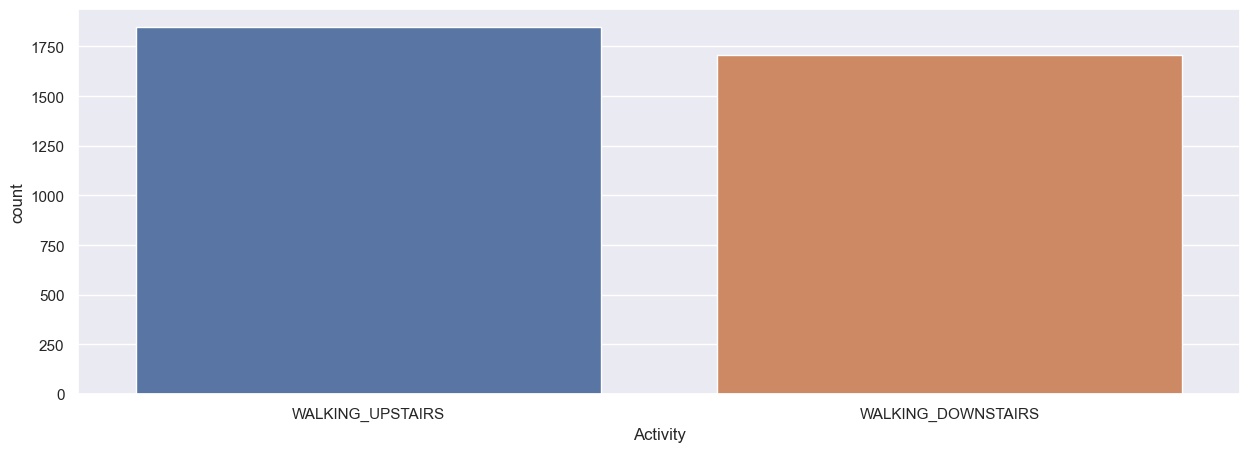

In [311]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

In [312]:
X = full_data.drop(['Activity'], axis=1)
y = full_data['Activity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z
867,0.217295,-0.028434,-0.035783,0.112690,0.385710,-0.278131,0.073424,0.245334,-0.287065,0.501013,...,-0.301946,0.305219,0.485231,0.308562,-0.666071,-0.635182,-0.777482,-0.283627,-0.181795,-0.453422
3057,0.428881,0.004840,-0.108698,-0.263388,-0.032116,0.092423,-0.348858,-0.095615,0.149626,0.053356,...,-0.125492,0.493782,0.413655,0.317654,-0.898850,-0.750283,-0.598553,-0.682846,-0.384990,-0.311902
1163,0.187071,-0.032107,-0.156791,-0.222231,-0.146233,-0.340326,-0.278601,-0.248293,-0.401392,0.410191,...,-0.366567,0.143293,0.561360,0.314966,-0.737395,-0.889602,-0.841046,-0.436873,-0.623606,-0.585178
195,0.301257,-0.010398,-0.114991,-0.245308,-0.419905,-0.174068,-0.346888,-0.478399,-0.222943,0.329154,...,-0.289752,0.338252,0.595247,0.508605,-0.836055,-0.873681,-0.863119,-0.486412,-0.694351,-0.527461
532,0.418868,-0.000011,-0.103503,0.876942,0.729609,0.551648,0.852822,0.644811,0.542567,0.907994,...,0.353257,-0.466959,-0.048729,-0.275701,0.095335,0.847927,-0.190960,0.529243,1.000000,0.117797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.400029,-0.014953,-0.126989,0.326649,0.258606,-0.163567,0.293623,0.243894,-0.202557,0.539610,...,-0.005868,-0.016227,0.520271,-0.141247,-0.589945,-0.662752,-0.402114,-0.020833,-0.337585,-0.117347
1294,0.274576,-0.016984,-0.074453,-0.423371,-0.291322,-0.266091,-0.479068,-0.298409,-0.288664,-0.047237,...,-0.554198,0.460545,0.701294,0.508131,-0.833057,-0.928221,-0.907610,-0.355079,-0.667176,-0.584252
860,0.118056,0.019812,-0.104178,0.232760,0.189882,-0.304102,0.149134,0.151479,-0.395100,0.478059,...,-0.192448,0.460159,0.409683,0.323111,-0.731936,-0.614766,-0.747220,-0.492185,-0.364478,-0.332030
3507,-0.007701,-0.122054,-0.124740,0.750625,2.483875,1.131515,0.564488,2.061673,0.901637,1.532026,...,0.984686,-0.717898,-0.716371,-0.459510,0.058430,0.104245,0.085652,0.245141,0.403617,0.288740


In [313]:
prepared_table_df_no_nulls_no_activity = prepared_table_df_no_nulls.drop(['Activity'], axis=1)
prepared_table_df_no_nulls_no_activity_shuffled = prepared_table_df_no_nulls_no_activity.sample(frac=1).reset_index(drop=True)
prepared_table_df_no_nulls_no_activity

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z
0,0.488941,0.106466,-0.498900,0.649484,1.734789,0.811103,0.559107,1.243836,0.701172,1.564101,...,0.204793,-0.378126,-0.045662,-0.058338,0.023749,0.034132,0.008229,0.233274,0.175700,0.104763
1,0.437071,0.303639,-0.504424,0.611379,1.180292,0.790977,0.539568,0.871591,0.615926,1.453269,...,0.193644,-0.257632,-0.463799,-0.215025,0.013525,0.067159,0.018413,0.220599,0.252745,0.244117
2,0.285927,0.216237,-0.395284,0.687936,1.402343,0.583938,0.570732,1.080691,0.463385,1.785157,...,0.264352,-0.271071,-0.363159,-0.230907,0.031225,0.083592,0.014791,0.328340,0.496404,0.130267
3,0.578575,0.035007,-0.336702,0.515013,1.453956,0.930995,0.425783,1.120727,0.723397,1.416565,...,0.319941,-0.265574,-0.338877,-0.266948,0.017495,0.063571,0.036401,0.187154,0.321239,0.313756
4,0.064121,-0.021307,-0.339204,0.316778,1.521262,0.578970,0.227586,1.139976,0.522901,0.969029,...,0.082161,-0.365908,-0.537867,-0.252593,0.029636,0.055228,0.014284,0.264963,0.331700,0.126831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,1.052601,0.120512,-0.140110,0.909101,2.386149,0.499764,0.739426,1.974377,0.397301,2.701095,...,0.290458,-0.379183,-0.476919,-0.229831,0.038736,0.097982,0.013979,0.324245,0.463633,0.161073
606,-0.753821,0.097080,-0.259892,0.779565,2.217774,0.501413,0.691400,1.821157,0.386739,0.684892,...,0.221585,-0.305729,-0.537240,-0.222043,0.033428,0.085951,0.006838,0.269689,0.495588,0.100599
607,-0.153631,0.245310,-0.218028,0.813680,2.170348,0.659931,0.649450,1.722738,0.527951,2.026596,...,0.423317,-0.432327,-0.375976,-0.184629,0.057646,0.151107,0.010936,0.266558,0.273583,0.155804
608,0.174269,-0.171825,-0.206283,0.738740,2.231625,0.491752,0.642054,1.817120,0.382575,1.689014,...,0.507309,-0.310921,-0.520595,-0.492648,0.037277,0.066027,0.023367,0.312983,0.395371,0.178826


In [318]:
# Decision Tree
# https://www.kaggle.com/code/essammohamed4320/human-activity-recognition-scientific-prespective?scriptVersionId=107355415&cellId=41
X = full_data.drop(['Activity'], axis=1)
y = full_data['Activity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=49)
kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 88.53727144866386
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 88.53727144866386
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 88.53727144866386


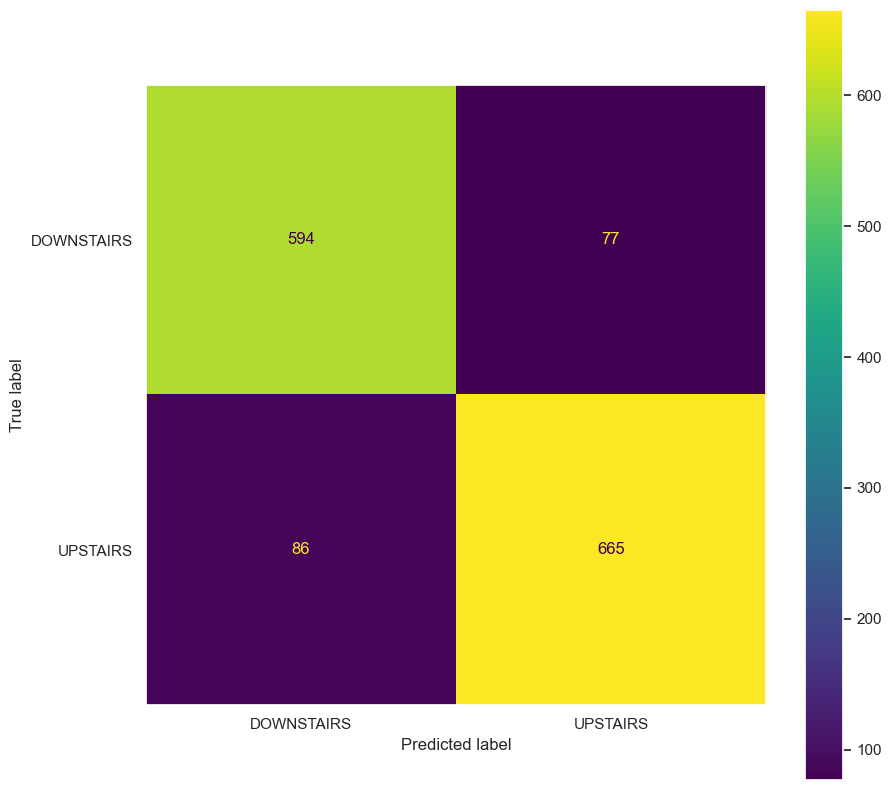

In [319]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy LogisticRegression 91.51031894934334  Test Accuracy LogisticRegression 91.13924050632912
Training Precesion LogisticRegression 91.51031894934334  Test Precesion LogisticRegression 91.13924050632912
Training Recall LogisticRegression 91.51031894934334  Test Recall LogisticRegression 91.13924050632912


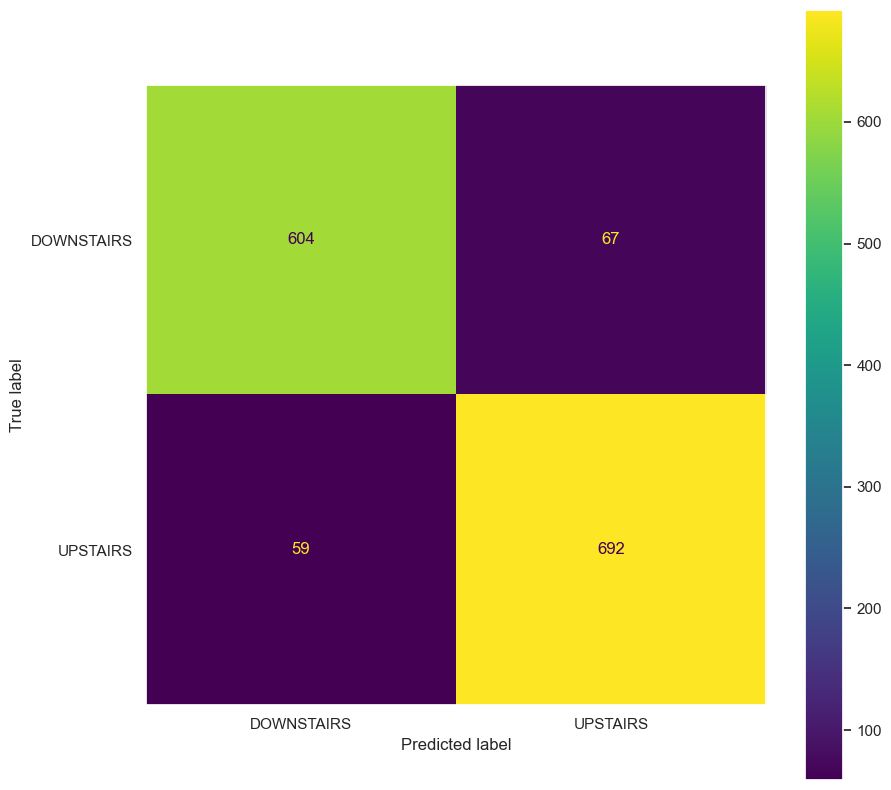

In [321]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lrm, "LogisticRegression", x_train, x_test, y_train, y_test)